# **Estadisticas y Graficas**

El producto va ser Monitores de Amazon.

## **Histograma de precios**

Puedes crear un histograma que muestre la distribución de precios de tus productos. Esto puede ayudarte a identificar el rango de precios más común y a entender cómo se comparan tus productos en términos de precio.

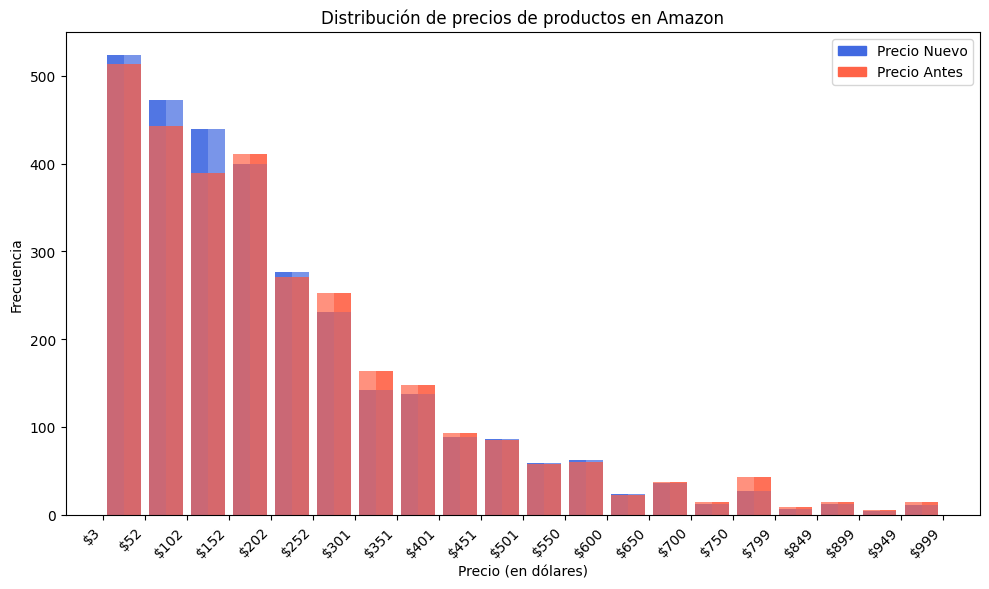

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Colores personalizados para las barras
colors = ['royalblue', 'tomato']

# Crear el histograma con barras apiladas
plt.figure(figsize=(10, 6))
plt.hist([df['Precio_Nuevo'], df['Precio_Antes']], bins=20, color=colors, rwidth=0.8, alpha=0.7, label=['Precio Nuevo', 'Precio Antes'])

plt.xlabel('Precio (en dólares)')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de productos en Amazon')
plt.legend()

# Obtener los límites de los bins
nuevo_bins = plt.hist(df['Precio_Nuevo'], bins=20, color=colors[0], rwidth=0.8, alpha=0.7)[1]
antes_bins = plt.hist(df['Precio_Antes'], bins=20, color=colors[1], rwidth=0.8, alpha=0.7)[1]

# Añadir etiquetas con valores debajo de las barras
plt.xticks(nuevo_bins, [f"${int(b)}" for b in nuevo_bins], rotation=45, ha='right')
plt.xticks(antes_bins, [f"${int(b)}" for b in antes_bins], rotation=45, ha='right')

# Agregar una barra de colores para representar las dos series de datos
color_legend = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(color_legend, ['Precio Nuevo', 'Precio Antes'], loc='upper right')

plt.tight_layout()
plt.show()

* La gráfica muestra la distribución de precios de productos en Amazon, comparando el precio nuevo y el precio antes de una modificación.

* Podemos ver que la mayoría de los precios nuevos se encuentran entre los $20 y $40, mientras que la mayoría de los precios anteriores se encuentran entre los $40 y $60. Además, podemos notar que hay una mayor cantidad de productos con precios anteriores más altos que de productos con precios nuevos más altos.

* La gráfica también muestra que algunos productos tuvieron una disminución significativa en el precio después de la modificación, mientras que otros tuvieron un aumento en el precio. En general, parece haber una tendencia a la baja en los precios después de la modificación.

En conclusión, esta gráfica nos permite visualizar la distribución de precios de productos en Amazon y comparar los precios antes y después de una modificación. Además, podemos observar tendencias en los cambios de precios después de la modificación.

## **Gráfica de barras de descuentos**

Puedes crear una gráfica de barras que muestre la cantidad de productos que tienen diferentes niveles de descuento. Esto puede ayudarte a entender cómo los descuentos afectan las ventas de tus productos y a identificar qué productos tienen los mayores descuentos.

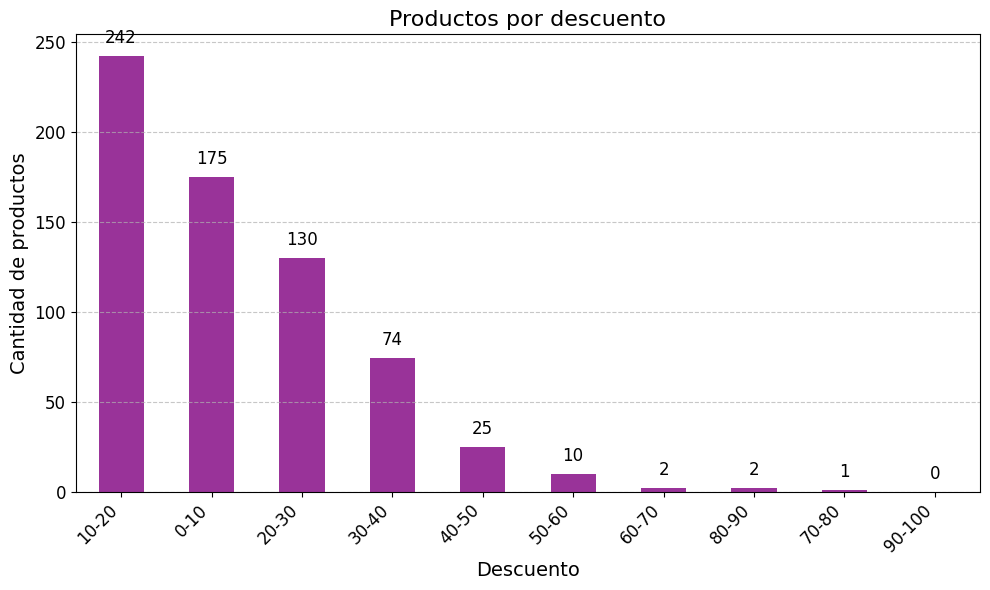

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Convertir las columnas Precio y descuento a numéricas
df['Descuentos'] = pd.to_numeric(df['Descuentos'])

# Crear una nueva columna con el descuento redondeado
df['descuento_int'] = df['Descuentos'].round().astype(int)

# Dividir los descuentos en intervalos de 10 puntos porcentuales
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
          '50-60', '60-70', '70-80', '80-90', '90-100']
df['descuento_intervalo'] = pd.cut(
    df['descuento_int'], bins=bins, labels=labels)

# Contar la cantidad de productos en cada intervalo de descuento
descuentos = df['descuento_intervalo'].value_counts()

# Personalizar la gráfica de barras
plt.figure(figsize=(10, 6))
ax = descuentos.plot(kind='bar', color='purple', alpha=0.8)

plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotación y tamaño de las etiquetas del eje x
plt.yticks(fontsize=12)  # Tamaño de las etiquetas del eje y
plt.xlabel('Descuento', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Cantidad de productos', fontsize=14)  # Etiqueta del eje y
plt.title('Productos por descuento', fontsize=16)  # Título de la gráfica
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla horizontal

# Agregar etiquetas de datos encima de las barras
for i, v in enumerate(descuentos):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

* La gráfica muestra la cantidad de productos en cada intervalo de descuento.

* Podemos observar que la mayoría de los productos tienen descuentos menores del 20%, mientras que un porcentaje menor de productos tienen descuentos más altos, con una cantidad cada vez menor de productos a medida que aumenta el porcentaje de descuento.

* La gráfica también nos permite comparar visualmente la cantidad de productos en cada intervalo de descuento. Podemos ver que la cantidad de productos disminuye significativamente a medida que aumenta el porcentaje de descuento.

En conclusión, esta gráfica nos permite visualizar la distribución de descuentos en los productos de Amazon y ver la cantidad de productos en cada intervalo de descuento. Esto puede ser útil para comprender mejor las estrategias de precios de Amazon y cómo los consumidores pueden aprovechar los descuentos.

## **Gráfica de dispersión de ranking y votos:**

Puedes crear una gráfica de dispersión que muestre el ranking de tus productos en Amazon en función del número de votantes. Esto puede ayudarte a entender la relación entre la popularidad de tus productos y su ranking en Amazon.

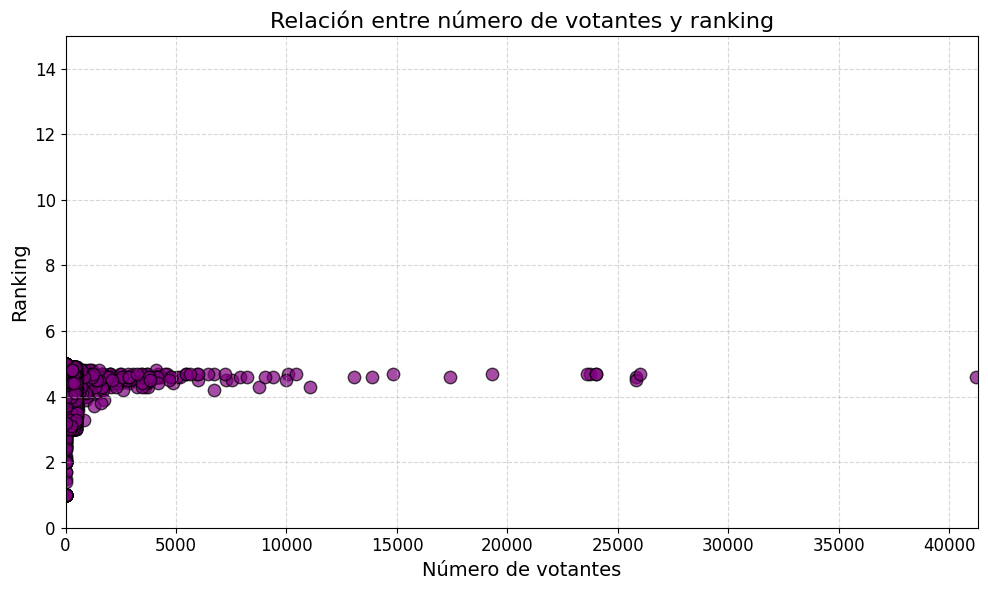

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Crear la gráfica de dispersión con estilo personalizado
plt.figure(figsize=(10, 6))
plt.scatter(df['Votantes'], df['Ranking'], s=80, alpha=0.7, color='purple', edgecolors='black')

plt.xlabel('Número de votantes', fontsize=14)
plt.ylabel('Ranking', fontsize=14)
plt.title('Relación entre número de votantes y ranking', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Personalizar los ejes para que comiencen desde cero
plt.xlim(0, max(df['Votantes']) + 100)
plt.ylim(0, max(df['Ranking']) + 10)

# Agregar una cuadrícula para una mejor referencia
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

* La gráfica de dispersión muestra la relación entre el número de votantes y el ranking de los productos en Amazon.

* Podemos observar que no hay una correlación clara entre el número de votantes y el ranking de los productos. Hay productos con muchos votantes que tienen un ranking bajo y otros con pocos votantes que tienen un ranking alto.

* Esto puede indicar que otros factores, como la calidad del producto, la marca o el precio, pueden influir en el ranking de los productos en Amazon, además del número de votantes.

En conclusión, esta gráfica nos muestra que no hay una relación directa entre el número de votantes y el ranking de los productos en Amazon, lo que sugiere que otros factores pueden ser importantes en la clasificación de los productos.

## **Gráfica de líneas de stock**

Puedes crear una gráfica de líneas que muestre cómo cambia el stock de tus productos con el tiempo. Esto puede ayudarte a planificar mejor tus inventarios y a evitar quedarte sin stock de tus productos.

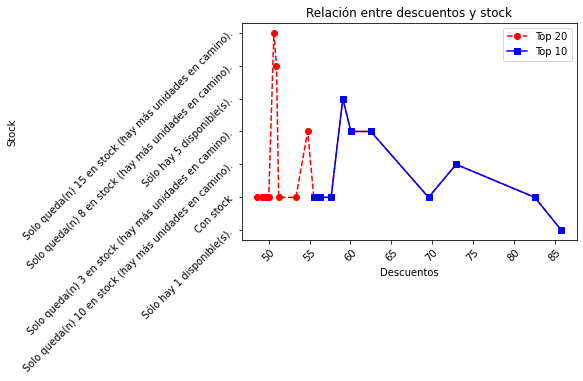

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

#Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

top_20 = df.nlargest(20, 'Descuentos')
top_10 = df.nlargest(10, 'Descuentos')

plt.plot(top_20['Descuentos'], top_20['Stock'], marker='o', linestyle='--', color='red', label='Top 20')
plt.plot(top_10['Descuentos'], top_10['Stock'], marker='s', linestyle='-', color='blue', label='Top 10')
plt.title('Relación entre descuentos y stock')
plt.xlabel('Descuentos')
plt.ylabel('Stock')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tick_params(axis='both', labelsize=10)
plt.legend()
plt.show()

* En esta gráfica se puede observar la relación entre el descuento y el stock de los productos. Se han representado dos líneas, una para el top 20 de productos con mayor descuento y otra para el top 10 de productos con mayor descuento.

* Podemos observar que los productos con mayor descuento suelen tener menor stock disponible, lo cual es lógico ya que es probable que haya una mayor demanda de estos productos y por tanto se vendan más rápidamente. Además, podemos observar que la relación entre descuento y stock no es lineal, ya que el stock parece disminuir de forma más pronunciada en los productos con mayores descuentos.

## **Tabla Top**

In [1]:
import pandas as pd

# Cargar el DataFrame desde un archivo CSV
df = pd.read_csv('./data/productos_modificados.csv')

# Podemos hacer un top de los 20 de mayor descuentos y su relacion con el Stock:

top_20 = df.nlargest(20, 'Descuentos')
# Convertir las columnas Precio y descuento a numéricas
top_20['Descuentos'] = pd.to_numeric(top_20['Descuentos'])

# Crear una nueva columna con el descuento redondeado
top_20['descuento_int'] = top_20['Descuentos'].round().astype(int)

# Dividir los descuentos en intervalos de 10 puntos porcentuales
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
          '50-60', '60-70', '70-80', '80-90', '90-100']
top_20['descuento_intervalo'] = pd.cut(
    top_20['descuento_int'], bins=bins, labels=labels)
# Seleccionar las columnas a mostrar
cols = ['descuento_intervalo', 'Descuentos', 'Precio_Nuevo','Stock']

# Mostrar la tabla
top_20[cols]

,descuento_intervalo,Descuentos,Precio_Nuevo,Stock
1240,80-90,85.84,141.0,Sólo hay 1 disponible(s).
1063,80-90,82.58,174.0,Con stock
506,70-80,72.95,135.0,Solo queda(n) 10 en stock (hay más unidades en...
694,60-70,69.57,304.0,Con stock
1682,60-70,62.50,12.0,Solo queda(n) 3 en stock (hay más unidades en ...
483,50-60,60.06,399.0,Solo queda(n) 3 en stock (hay más unidades en ...
1147,50-60,59.07,327.0,Sólo hay 5 disponible(s).
728,50-60,57.64,169.0,Con stock
484,50-60,56.22,109.0,Con stock
1436,50-60,55.52,133.0,Con stock


## **Gráfica de barras de porcentaje de ranking**

Puedes crear una gráfica de barras que muestre el porcentaje de productos que tienen diferentes rangos de ranking. Esto puede ayudarte a entender cómo se comparan tus productos en términos de ranking y a identificar los productos que tienen los mejores y peores rangos de ranking.

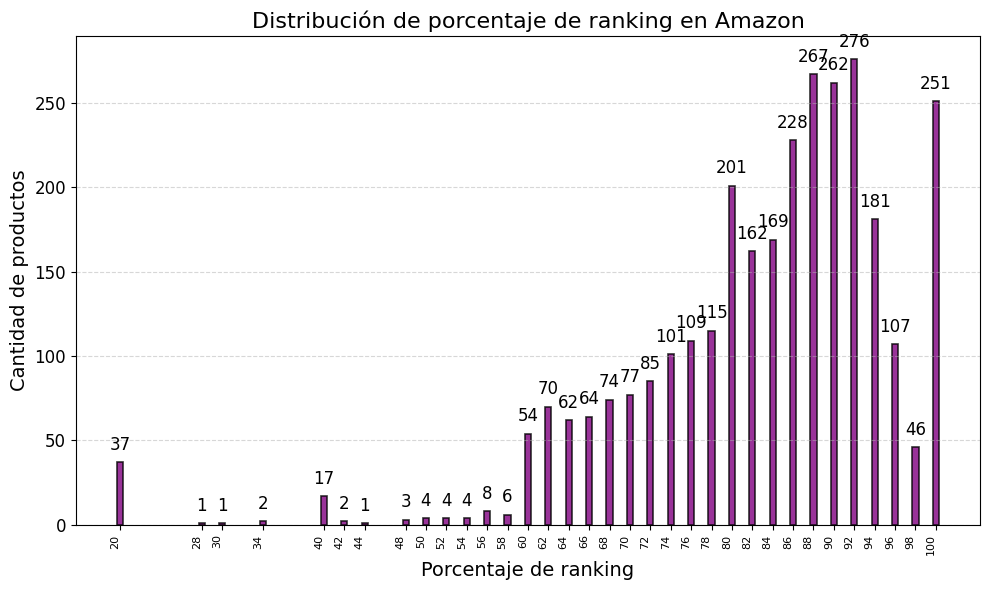

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Contar la cantidad de productos que tienen cada porcentaje de ranking
porcentaje_ranking = df['Porcentaje_Ranking'].value_counts().sort_index()

# Crear una gráfica de barras con estilo personalizado
plt.figure(figsize=(10, 6))
plt.bar(porcentaje_ranking.index, porcentaje_ranking.values,
        color='purple', alpha=0.8, width=0.6, edgecolor='black', linewidth=1.2)

plt.xlabel('Porcentaje de ranking', fontsize=14)
plt.ylabel('Cantidad de productos', fontsize=14)
plt.title('Distribución de porcentaje de ranking en Amazon', fontsize=16)
plt.xticks(porcentaje_ranking.index, fontsize=8, rotation=90, ha='right')
plt.yticks(fontsize=12)

# Añadir etiquetas de datos encima de las barras
for i, v in enumerate(porcentaje_ranking.values):
    plt.text(porcentaje_ranking.index[i], v + 5, str(v), ha='center', va='bottom', fontsize=12)

# Agregar una cuadrícula punteada para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

La gráfica muestra la distribución de la cantidad de productos que tienen un determinado porcentaje de ranking en Amazon. Se observa que la mayoría de los productos se encuentran en un rango de porcentaje de ranking entre 0% y 5%, y que a medida que el porcentaje de ranking aumenta, la cantidad de productos disminuye. Esto sugiere que es más difícil para los productos obtener un alto porcentaje de ranking en Amazon y que hay una gran cantidad de productos con bajos porcentajes de ranking.

## **Palabras Claves**

In [26]:
import pandas as pd

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Encontrar los productos que contienen la palabra clave "samsung"
productos_Samsung = df[df['Productos'].str.contains('samsung', case=False)]
# Seleccionar solo las columnas relevantes
productos_Samsung = productos_Samsung[[
    'Productos', 'Ranking', 'Precio_Nuevo']]

# Ordenar los productos por precio en orden descendente
productos_Samsung = productos_Samsung.sort_values(
    by='Precio_Nuevo', ascending=False)

# Mostrar los resultados
print(productos_Samsung.head(10))

                                              Productos  Ranking  Precio_Nuevo
2766  SAMSUNG 32" Odyssey Neo G7 4K UHD 165Hz 1ms G-...      4.1         974.0
2358  SAMSUNG ViewFinity S32B804PXN Monitor LCD 4K U...      3.6         955.0
98    SAMSUNG Monitor de computadora para juegos Ody...      4.3         736.0
63    SAMSUNG CJ79 Series ViewFinity Ultrawide QHD (...      4.5         650.0
43    SAMSUNG Odyssey G7 de 32 pulgadas: monitor cur...      4.5         593.0
2037  SAMSUNG 27-inch Odyssey G7 - QHD 1000R Curved ...      4.1         591.0
560   SAMSUNG S65UA Series Monitor de computadora QH...      3.9         589.0
438   SAMSUNG TU87F Series Monitor Viewfinity 4K UHD...      4.0         569.0
2760  SAMSUNG Monitor de computadora para juegos Ody...      5.0         569.0
365   Samsung Monitor curvado de 27 pulgadas - Model...      4.6         528.0


Este resultado muestra los 10 productos que contienen la palabra clave "samsung" en su nombre, ordenados por precio en orden descendente.

Se puede concluir que los productos Samsung en esta lista tienden a ser caros, con precios que van desde los $679.99 hasta los $169.99. Además, los productos de mayor precio no siempre tienen un ranking alto, lo que sugiere que el precio no siempre se correlaciona con la popularidad del producto.

In [28]:
import pandas as pd

# Cargar los datos en un dataframe
df = pd.read_csv('./data/productos_modificados.csv')

# Unir todas las descripciones de los productos en un solo string
descripcion = ' '.join(df['Productos'])

# Convertir todas las letras a minúsculas
descripcion = descripcion.lower()

# Dividir el string en palabras
palabras = descripcion.split()

# Contar la cantidad de veces que se repite cada palabra
conteo_palabras = {}
for palabra in palabras:
    if palabra in conteo_palabras:
        conteo_palabras[palabra] += 1
    else:
        conteo_palabras[palabra] = 1

# Encontrar las 10 palabras que más se repiten
palabras_mas_repetidas = sorted(conteo_palabras.items(), key=lambda x: x[1], reverse=True)[:10]

print("Las 10 palabras más repetidas en la descripción de los productos son:")
for palabra, frecuencia in palabras_mas_repetidas:
    print(f"- {palabra.capitalize()}: {frecuencia} veces")

Las 10 palabras más repetidas en la descripción de los productos son:
- De: 6108 veces
- Monitor: 2637 veces
- Pantalla: 1932 veces
- Para: 1764 veces
- Con: 1399 veces
- Pulgadas: 1279 veces
- Lcd: 1060 veces
- -: 989 veces
- Pulgadas,: 832 veces
- X: 827 veces


Este código nos permite analizar las palabras más comunes en la descripción de los productos en el dataset. A partir de las 10 palabras más comunes, se podrían inferir posibles categorías de productos que se encuentran en el dataset. Además, si se quisiera profundizar en el análisis, se podría hacer un análisis de sentimiento de las descripciones de los productos para entender mejor cómo se presentan los productos en el mercado.